In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(pd.__version__)

2.3.0


In [3]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv')

In [6]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,plot_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,experion windchants,sector 112,3.65,11428.0,3194.0,Built Up area: 2800 (260.13 sq.m.),3.0,5.0,2,...,2800.0,NaN,NaN,0,1,0,0,0,0,72
1,flat,vatika gurgaon,sector 83,1.25,7812.0,1600.0,Super Built up area 2390(222.04 sq.m.)Carpet a...,4.0,4.0,3,...,NaN,1600.0,NaN,0,1,0,0,0,0,103
2,flat,green court,sector 90,0.47,6811.0,690.0,Carpet area: 690 (64.1 sq.m.),2.0,2.0,1,...,NaN,690.0,NaN,0,0,0,0,0,0,49
3,flat,orchid petals,sector 49,1.90,10526.0,1805.0,Super Built up area 1805(167.69 sq.m.)Built Up...,3.0,3.0,3,...,1600.0,1400.0,NaN,0,0,0,0,1,2,49
4,flat,bestech altura,sector 79,2.69,12500.0,2152.0,Super Built up area 2150(199.74 sq.m.),3.0,4.0,3+,...,NaN,NaN,NaN,0,1,0,0,0,0,49


In [7]:
df.shape()

TypeError: 'tuple' object is not callable

In [8]:
df.shape

(3850, 24)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3850 entries, 0 to 3849
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3850 non-null   object 
 1   society              3849 non-null   object 
 2   sector               3850 non-null   object 
 3   price                3785 non-null   float64
 4   price_per_sqft       3823 non-null   float64
 5   area                 3785 non-null   float64
 6   areaWithType         3803 non-null   object 
 7   bedRoom              3803 non-null   float64
 8   bathroom             3803 non-null   float64
 9   balcony              3803 non-null   object 
 10  floorNum             3784 non-null   float64
 11  facing               2698 non-null   object 
 12  agePossession        3850 non-null   object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1733 non-null   float64
 15  carpet_area          1944 non-null   f

In [11]:
df.duplicated().sum()

np.int64(132)

In [12]:

df.drop_duplicates(inplace=True)

In [13]:
df.shape

(3718, 24)

<Axes: xlabel='property_type'>

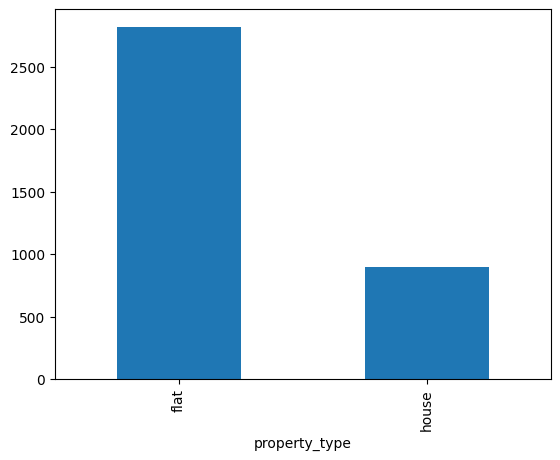

In [16]:
df['property_type'].value_counts().plot(kind='bar')

# Observations
-Flats are in majority(75 percent) and there are less number of houses(~25 percent)

-No missing values

In [17]:
df['society'].value_counts().shape

(677,)

In [18]:
df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(75)

society
tulip violet                            0.023263
ss the leaf                             0.045906
dlf new town heights                    0.058933
shapoorji pallonji joyville gurugram    0.071960
signature global park                   0.082816
                                          ...   
indiabulls enigma                       0.491625
umang winter hills                      0.495658
the close north                         0.499690
ramsons kshitij                         0.503722
ireo the corridors                      0.507444
Name: proportion, Length: 75, dtype: float64

In [22]:
society_counts=df['society'].value_counts()
frequency_bins = {
    "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': np.int64(1),
 'High (50-100)': np.int64(2),
 'Average (10-49)': np.int64(92),
 'Low (2-9)': np.int64(277),
 'Very Low (1)': np.int64(305)}

<Axes: xlabel='society'>

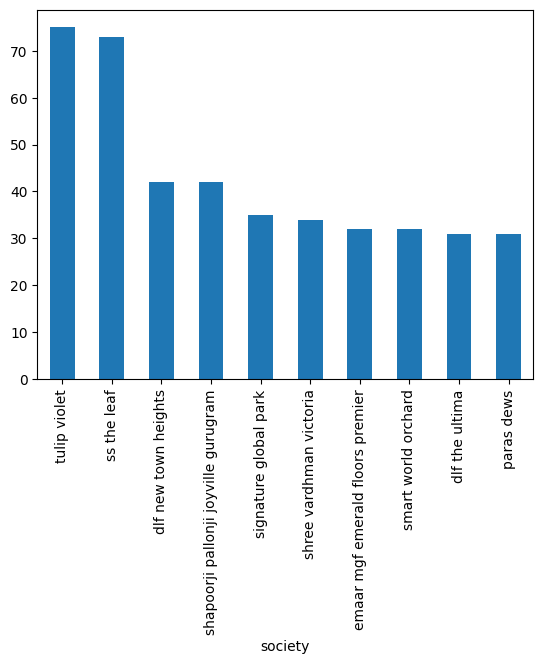

In [23]:
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')

In [24]:
df['society'].isnull().sum()

np.int64(1)

In [25]:

df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,plot_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3826,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2.0,2.0,0,...,1625.0,NaN,NaN,0,0,0,0,0,0,0


# Observations
- Around 13% properties comes under independent tag.
- There are 677 societies.
- The top 75 societies have 50 percent of the preperties and the rest 50 percent of the properties come under the remaining 600 societies
- Very High (>100): Only 1 society has more than 100 listings.
- High (50-100): 2 societies have between 50 to 100 listings.
- Average (10-49): 92 societies fall in this range with 10 to 49 listings each.
- Low (2-9): 273 societies have between 2 to 9 listings.
- Very Low (1): A significant number, 308 societies, have only 1 listing.
- 1 missing value


<Axes: xlabel='sector'>

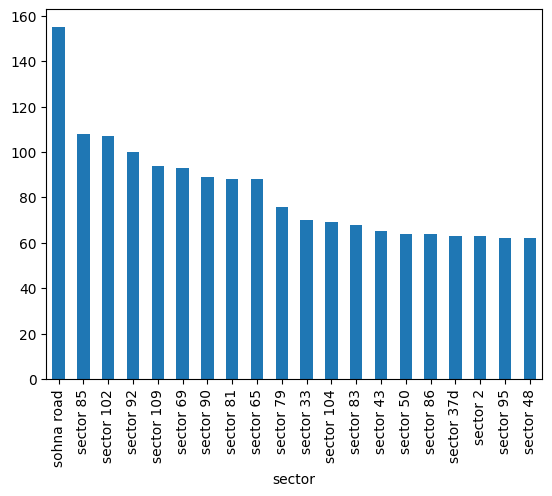

In [29]:
# unique sectors
df['sector'].value_counts().head(20).plot(kind='bar')

In [30]:
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': np.int64(3),
 'High (50-100)': np.int64(26),
 'Average (10-49)': np.int64(62),
 'Low (2-9)': np.int64(21),
 'Very Low (1)': np.int64(1)}

In [32]:
df['sector'].isnull().sum()

np.int64(0)

# Observations
- There are a total of 104 unique sectors in the dataset.
- Frequency distribution of sectors:
- Very High (>100): 3 sectors have more than 100 listings.
- High (50-100): 25 sectors have between 50 to 100 listings.
- Average (10-49): A majority, 60 sectors, fall in this range with 10 to 49 listings each.
- Low (2-9): 16 sectors have between 2 to 9 listings.
- Very Low (1): Interestingly, there are no sectors with only 1 listing.

In [33]:
df['price'].isnull().sum()

np.int64(58)

In [34]:
df['price'].describe()

count    3660.000000
mean        2.533664
std         2.980623
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

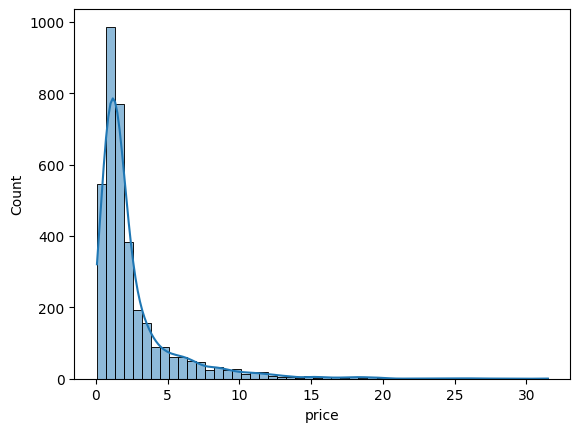

In [35]:
sns.histplot(df['price'], kde=True, bins=50)

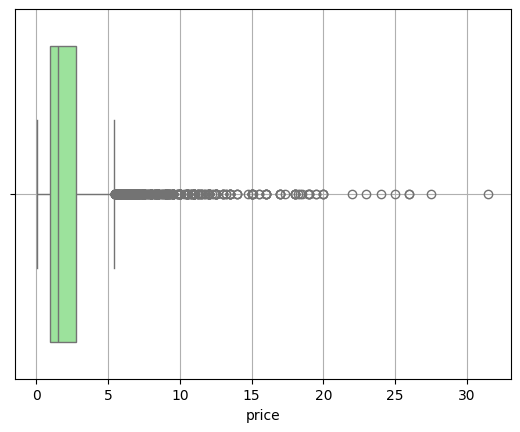

In [36]:
sns.boxplot(x=df['price'], color='lightgreen')
plt.grid()

In [43]:
df[df['price'].isnull()].sample(5)


,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,plot_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2289,house,emaar mgf marbella,sector 66,NaN,16039.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,74
573,house,puri diplomatic greens,sector 111,NaN,12828.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,36
1017,house,eldeco mansionz,sector 48,NaN,22222.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0
410,house,saksham welfare association,sector 22,NaN,19645.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0
3119,house,independent,sector 52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0


# Descriptive Statistics:

- Count: There are 3,660 non-missing price entries.
- Mean Price: The average price is approximately 2.53 crores.
- Median Price: The median (or 50th percentile) price is 1.52 crores.
- Standard Deviation: The prices have a standard deviation of 2.98, indicating variability in the prices.
- Range: Prices range from a minimum of 0.07 crores to a maximum of 31.5 crores.
- IQR: The interquartile range (difference between 75th and 25th percentile) is from 0.95 crores to 2.75 crores.

# Visualizations:

- Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.
- Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.
# missing values
 - there are total 58 missing values

In [44]:
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness,kurtosis)

3.2791704733134623 14.933372629214254


###  Skewness and Kurtosis Analysis

**Skewness:**
The price distribution has a skewness of approximately **3.28**, indicating a **positive skew**. This means the distribution tail is skewed to the right, which aligns with our observation from the histogram—most properties have prices on the lower end, with a few high-priced properties pulling the distribution's tail to the right.

**Kurtosis:**
The kurtosis value is approximately **14.93**. A kurtosis greater than 3 indicates a **leptokurtic** distribution, meaning it has **heavier tails** and **more outliers** compared to a normal distribution. This suggests the presence of extreme price values in the dataset.


In [53]:
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])

quantiles

0.01     0.250
0.05     0.370
0.95     8.500
0.99    15.264
Name: price, dtype: float64

## Quantile Analysis:

- 1% Quantile: Only 1% of properties are priced below 0.25 crores.
- 5% Quantile: 5% of properties are priced below 0.37 crores.
- 95% Quantile: 95% of properties are priced below 8.5 crores.
- 99% Quantile: 99% of properties are priced below 15.26 crores, indicating that very few properties are priced above this value.

In [54]:
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
IQR = Q3 - Q1

IQR

np.float64(1.8)

In [55]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-1.7500000000000002 5.45


In [56]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(425, 24)

In [57]:
outliers['price'].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

## Outliers Analysis (using IQR method):

- Based on the IQR method, there are 425 properties considered as outliers.
- These outliers have an average price of approximately 9.24 crores.
- The range for these outliers is from 5.46 crores to 31.5 crores.

<Axes: xlabel='price'>

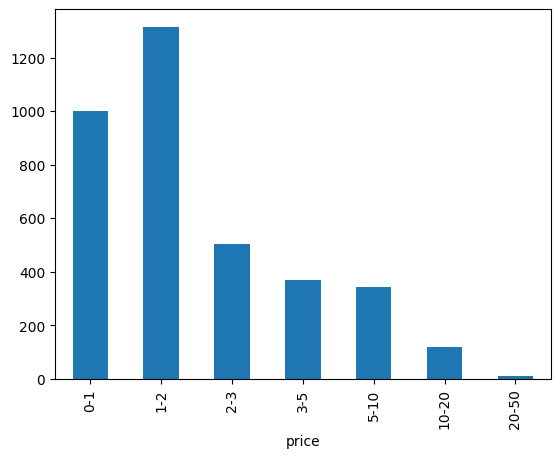

In [58]:
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

- The majority of properties are priced in the "1-2 crores" and "2-3 crores" ranges.
- There's a significant drop in the number of properties priced above "5 crores."

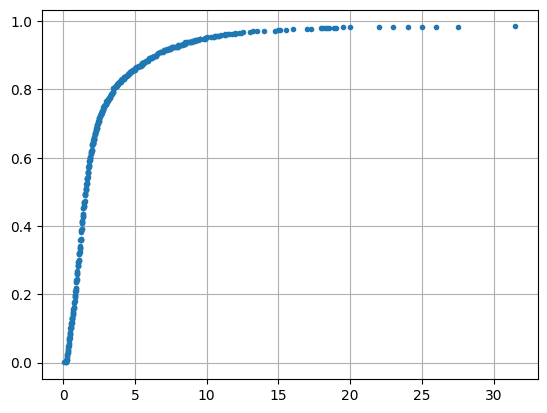

In [59]:
ecdf = df['price'].value_counts().sort_index().cumsum() / len(df['price'])
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.grid()


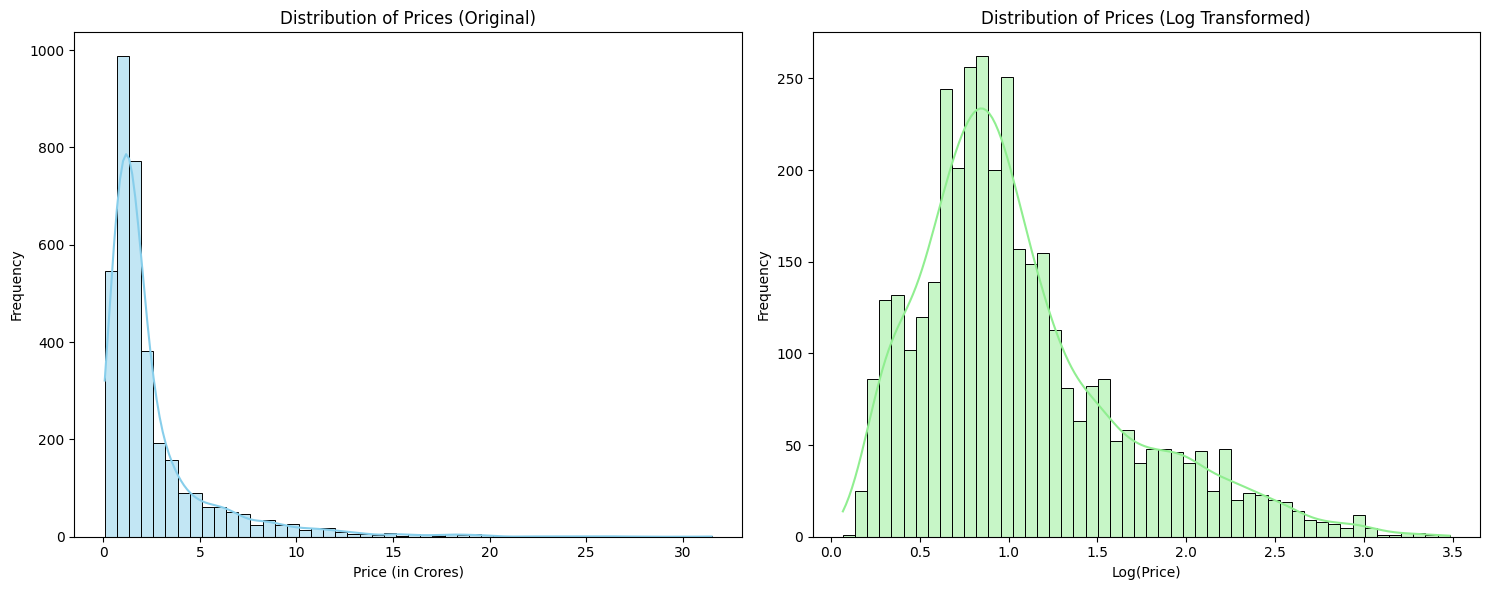

In [60]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- np.log1p(x): This function computes the natural logarithm of 1+x. It's designed to provide more accurate results for values of x that are very close to zero.

- Using np.log1p helps in transforming the price column while ensuring that any value (including zero, if present) is handled appropriately. When we need to reverse the transformation, we can use np.expm1 which computes e^x-1

In [61]:
df.head(

)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,plot_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,experion windchants,sector 112,3.65,11428.0,3194.0,Built Up area: 2800 (260.13 sq.m.),3.0,5.0,2,...,2800.0,NaN,NaN,0,1,0,0,0,0,72
1,flat,vatika gurgaon,sector 83,1.25,7812.0,1600.0,Super Built up area 2390(222.04 sq.m.)Carpet a...,4.0,4.0,3,...,NaN,1600.0,NaN,0,1,0,0,0,0,103
2,flat,green court,sector 90,0.47,6811.0,690.0,Carpet area: 690 (64.1 sq.m.),2.0,2.0,1,...,NaN,690.0,NaN,0,0,0,0,0,0,49
3,flat,orchid petals,sector 49,1.90,10526.0,1805.0,Super Built up area 1805(167.69 sq.m.)Built Up...,3.0,3.0,3,...,1600.0,1400.0,NaN,0,0,0,0,1,2,49
4,flat,bestech altura,sector 79,2.69,12500.0,2152.0,Super Built up area 2150(199.74 sq.m.),3.0,4.0,3+,...,NaN,NaN,NaN,0,1,0,0,0,0,49


In [62]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness,kurtosis)

1.0740709565255313 0.9646692415449274


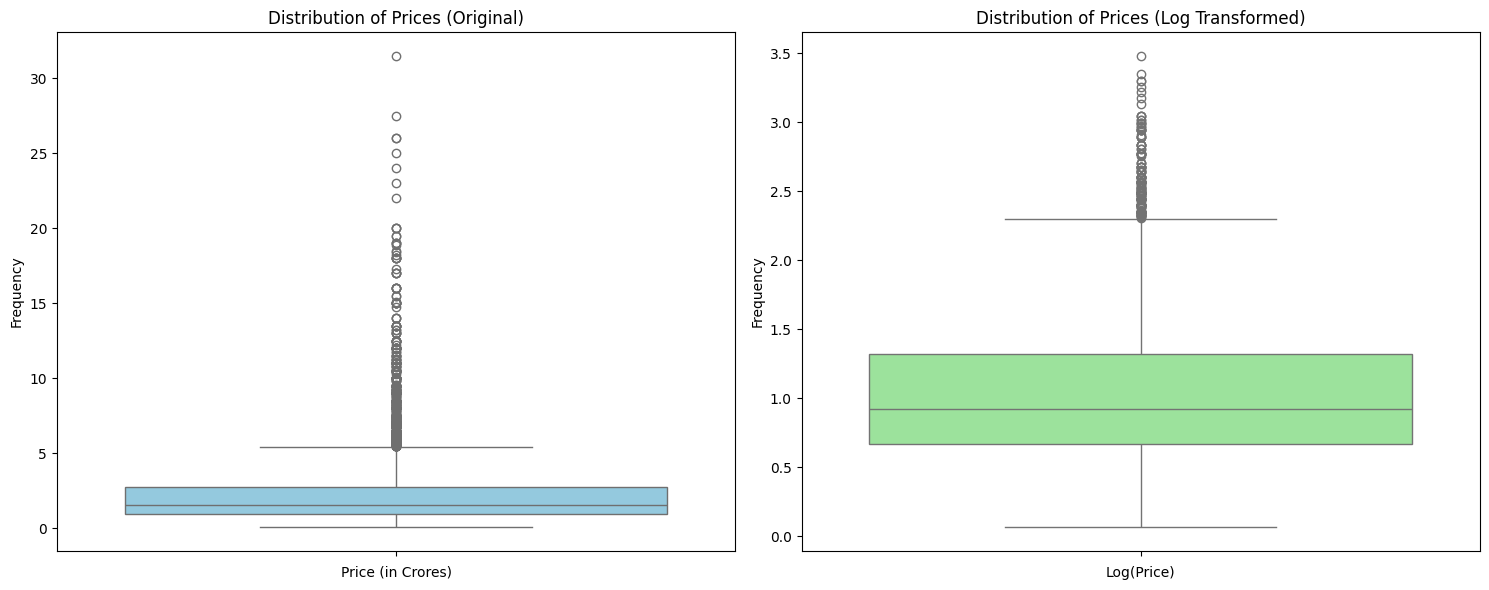

In [63]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [64]:
df['price_per_sqft'].isnull().sum()

np.int64(25)

In [65]:
df['price_per_sqft'].describe()

count      3693.000000
mean      13920.877606
std       23128.300174
min           4.000000
25%        6839.000000
50%        9039.000000
75%       13913.000000
max      600000.000000
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

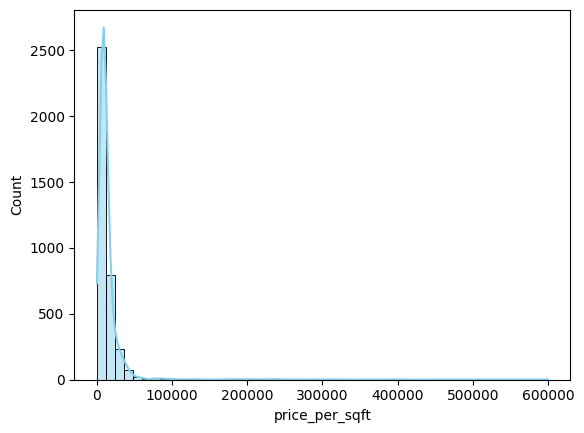

In [66]:
sns.histplot(df['price_per_sqft'], bins=50, color='skyblue', kde=True)

Most properties have a price_per_sqft ranging between approximately ₹0 and ₹40,000. There is a significant concentration in the lower range, with a few properties having exceptionally high price_per_sqft.

<Axes: ylabel='price_per_sqft'>

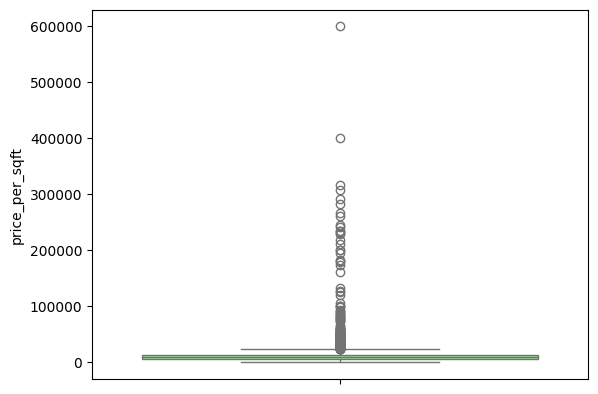

In [67]:
sns.boxplot(df['price_per_sqft'], color='lightgreen')

The box plot clearly shows several outliers, especially on the higher side. The interquartile range (IQR) is relatively compact, but there are many data points beyond the "whiskers" of the box plot, indicating potential outliers
**observations**
- potential outliers
- 25 missing values
- Rightly Skewed

In [85]:


df['bedRoom'].isnull().sum()

np.int64(41)

<Axes: xlabel='bedRoom'>

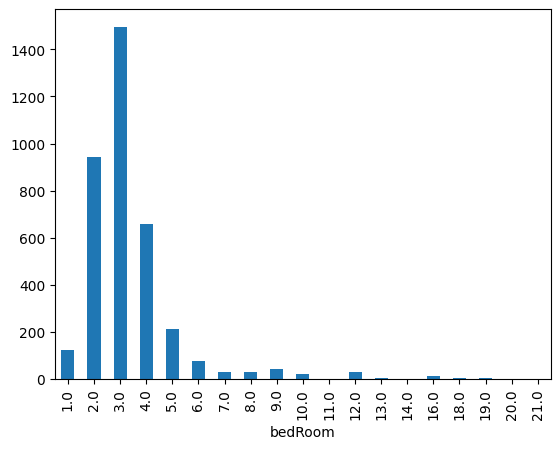

In [86]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

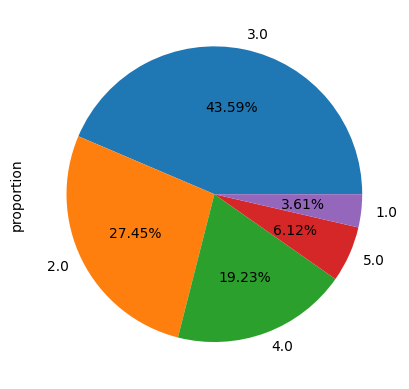

In [87]:
df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [88]:


df['bathroom'].isnull().sum()

np.int64(0)

<Axes: xlabel='bathroom'>

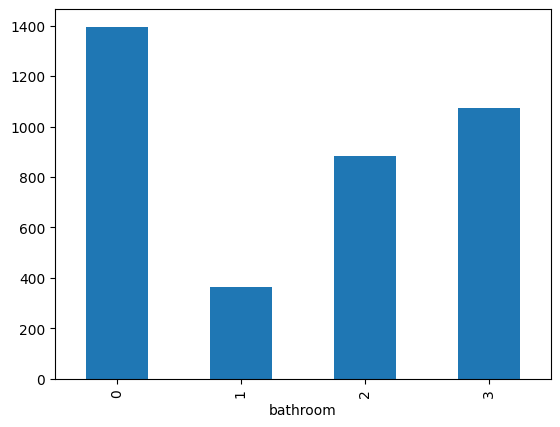

In [90]:

# Step 1: Convert 'bathroom' to numeric, forcing errors to NaN
df['bathroom'] = pd.to_numeric(df['bathroom'], errors='coerce')

# Step 2: Fill any NaNs with a default value like 0 (or you can drop them)
df['bathroom'] = df['bathroom'].fillna(0).astype(int)

# Step 3: Plot the bar chart
df['bathroom'].value_counts().sort_index().plot(kind='bar')


<Axes: ylabel='proportion'>

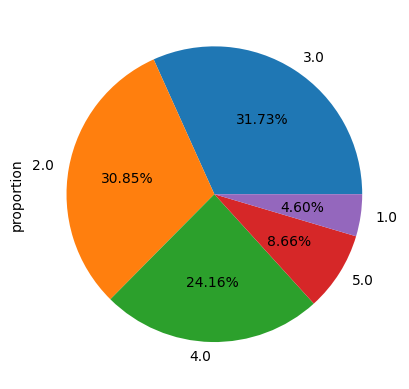

In [73]:
df['bathroom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [75]:

df['balcony'] = df['balcony'].fillna(0)
df['balcony'].isnull().sum()


np.int64(0)

<Axes: xlabel='balcony'>

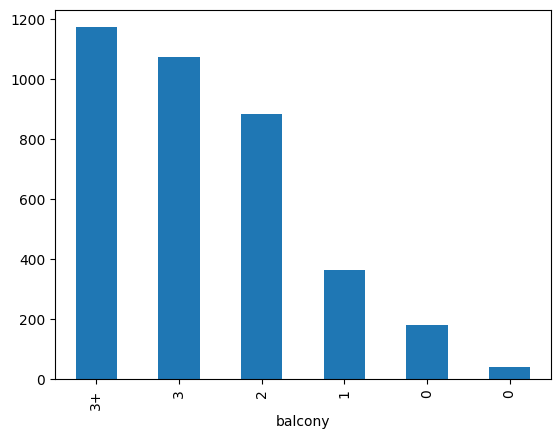

In [91]:
df['balcony'].value_counts().plot(kind='bar')

<Axes: ylabel='proportion'>

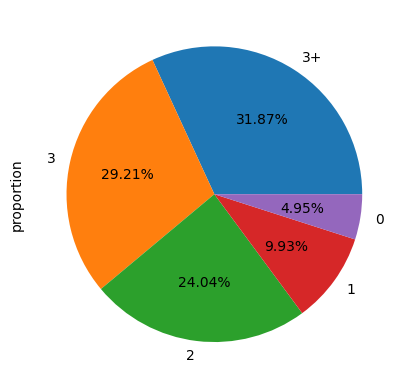

In [92]:
df['balcony'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [93]:
df['floorNum'].isnull().sum()

np.int64(60)

In [94]:
df['floorNum'].describe()

count    3658.000000
mean        6.798250
std         6.012454
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<Axes: xlabel='floorNum'>

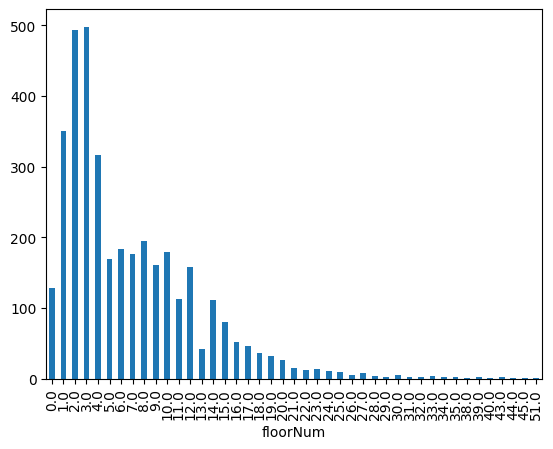

In [95]:
df['floorNum'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='floorNum'>

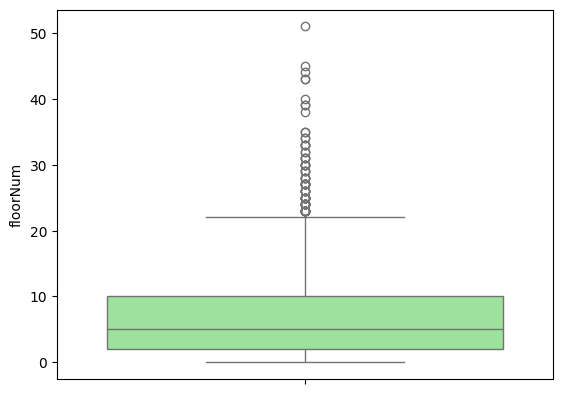

In [96]:
sns.boxplot(df['floorNum'], color='lightgreen')

- The majority of the properties lie between the ground floor (0) and the 25th floor.
- Floors 1 to 4 are particularly common, with the 3rd floor being the most frequent.
- There are a few properties located at higher floors, but their frequency is much lower.
- The box plot reveals that the majority of the properties are concentrated around the lower floors. The interquartile range (IQR) lies between approximately the 2nd and 10th floors.
- Data points beyond the "whiskers" of the box plot, especially on the higher side, indicate potential outliers.

In [97]:
df['facing'].isnull().sum()

np.int64(1086)

In [99]:

df['facing'].fillna('NA',inplace=True)

In [100]:
df['facing'].value_counts()


facing
NA            1086
North-East     623
East           623
North          387
West           249
South          231
North-West     193
South-East     173
South-West     153
Name: count, dtype: int64

In [101]:
df['agePossession'].isnull().sum()

np.int64(0)

In [102]:
df['agePossession'].value_counts()

agePossession
Relatively New        1646
New Property           593
Moderately Old         563
Undefined              347
Old Property           303
Under Construction     266
Name: count, dtype: int64

In [103]:
df['super_built_up_area'].isnull().sum()

np.int64(1843)

In [104]:
df['super_built_up_area'].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

<Axes: xlabel='super_built_up_area', ylabel='Count'>

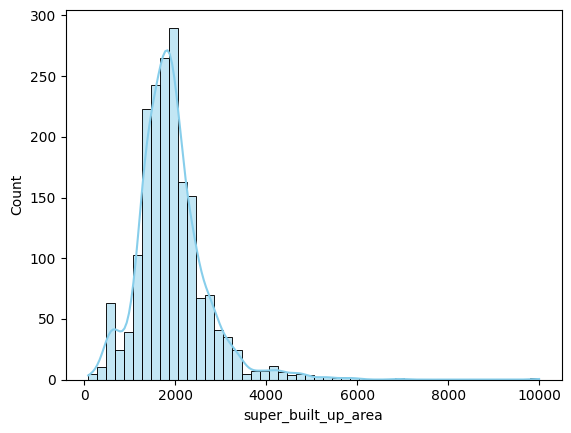

In [105]:
sns.histplot(df['super_built_up_area'].dropna(), bins=50, color='skyblue', kde=True)

<Axes: ylabel='super_built_up_area'>

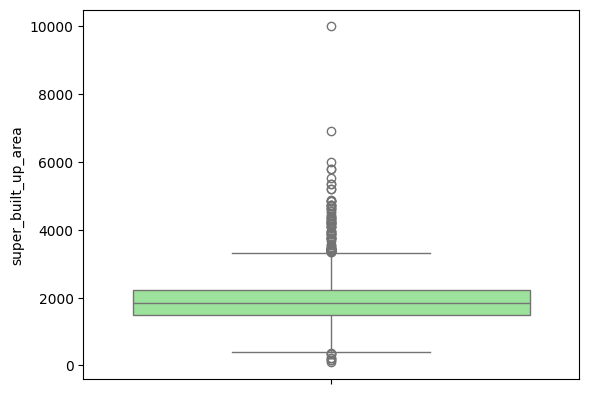

In [106]:
sns.boxplot(df['super_built_up_area'].dropna(), color='lightgreen')

- Most properties have a super built-up area ranging between approximately 1,000 sq.ft and 2,500 sq.ft.
- There are a few properties with a significantly larger area, leading to a right-skewed distribution.
- The interquartile range (IQR) lies between roughly 1,480 sq.ft and 2,215 sq.ft, indicating that the middle 50% of the properties fall within this range.
- There are several data points beyond the upper "whisker" of the box plot, indicating potential outliers. These are properties with an unusually large super built-up area.

In [107]:
# built up area
df['built_up_area'].isnull().sum()

np.int64(2028)

In [108]:
df['built_up_area'].describe()

count      1690.000000
mean       1841.931378
std       17945.374399
min           2.000000
25%         360.000000
50%        1256.500000
75%        1900.000000
max      737147.000000
Name: built_up_area, dtype: float64

<Axes: xlabel='built_up_area', ylabel='Count'>

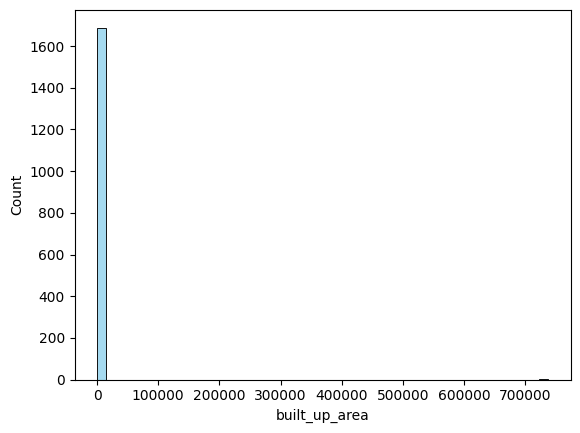

In [109]:
sns.histplot(df['built_up_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: ylabel='built_up_area'>

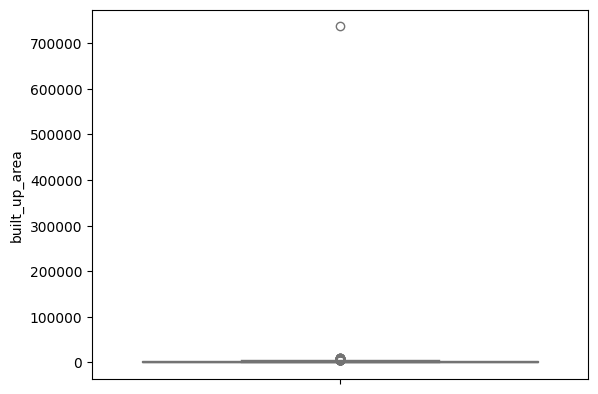

In [110]:
sns.boxplot(df['built_up_area'].dropna(), color='lightgreen')

### Most properties have a built-up area ranging roughly between 500 sq.ft and 3,500 sq.ft.
- There are very few properties with a much larger built-up area, leading to a highly right-skewed distribution.
- The box plot confirms the presence of significant outliers on the higher side. The data's interquartile range (IQR) is relatively compact, but the "whiskers" of the box plot are stretched due to the outliers.
- The presence of extreme values, especially on the higher side, suggests that there may be outliers or data errors. This could also be due to some properties being exceptionally large, like a commercial complex or an entire building being listed.

In [111]:
df['carpet_area'].isnull().sum()

np.int64(1846)

In [112]:
df['carpet_area'].describe()

count      1872.000000
mean       2529.179507
std       22799.836449
min          15.000000
25%         843.000000
50%        1300.000000
75%        1790.000000
max      607936.000000
Name: carpet_area, dtype: float64

<Axes: xlabel='carpet_area', ylabel='Count'>

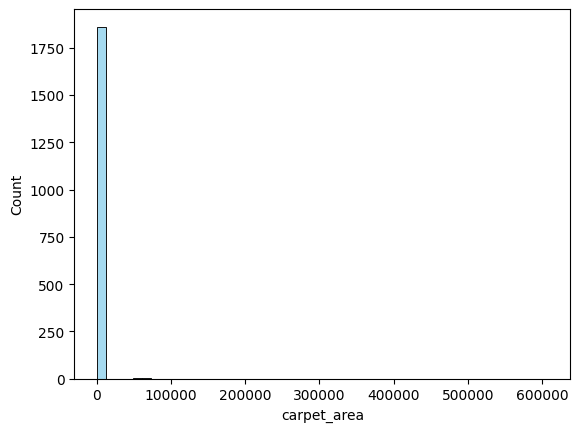

In [113]:
sns.histplot(df['carpet_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: ylabel='carpet_area'>

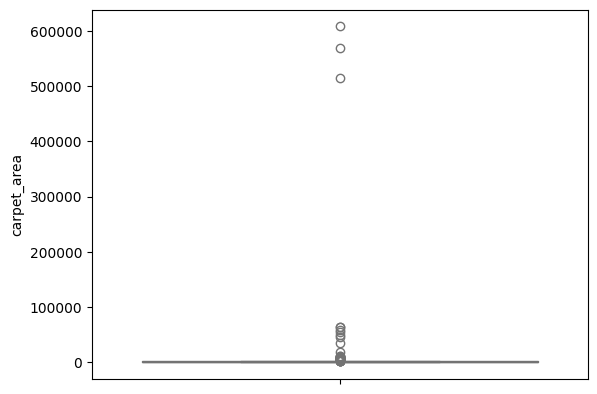

In [114]:
sns.boxplot(df['carpet_area'].dropna(), color='lightgreen')

In [115]:
df.iloc[:,16:]

,plot_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,badRoom
0,NaN,0,1,0,0,0,0,72,3.0
1,NaN,0,1,0,0,0,0,103,4.0
2,NaN,0,0,0,0,0,0,49,2.0
3,NaN,0,0,0,0,1,2,49,3.0
4,NaN,0,1,0,0,0,0,49,3.0
...,...,...,...,...,...,...,...,...,...
3845,NaN,0,1,0,0,0,0,37,3.0
3846,NaN,0,0,0,0,0,0,16,3.0
3847,NaN,0,0,0,0,0,0,49,4.0
3848,NaN,1,1,0,0,0,0,174,4.0


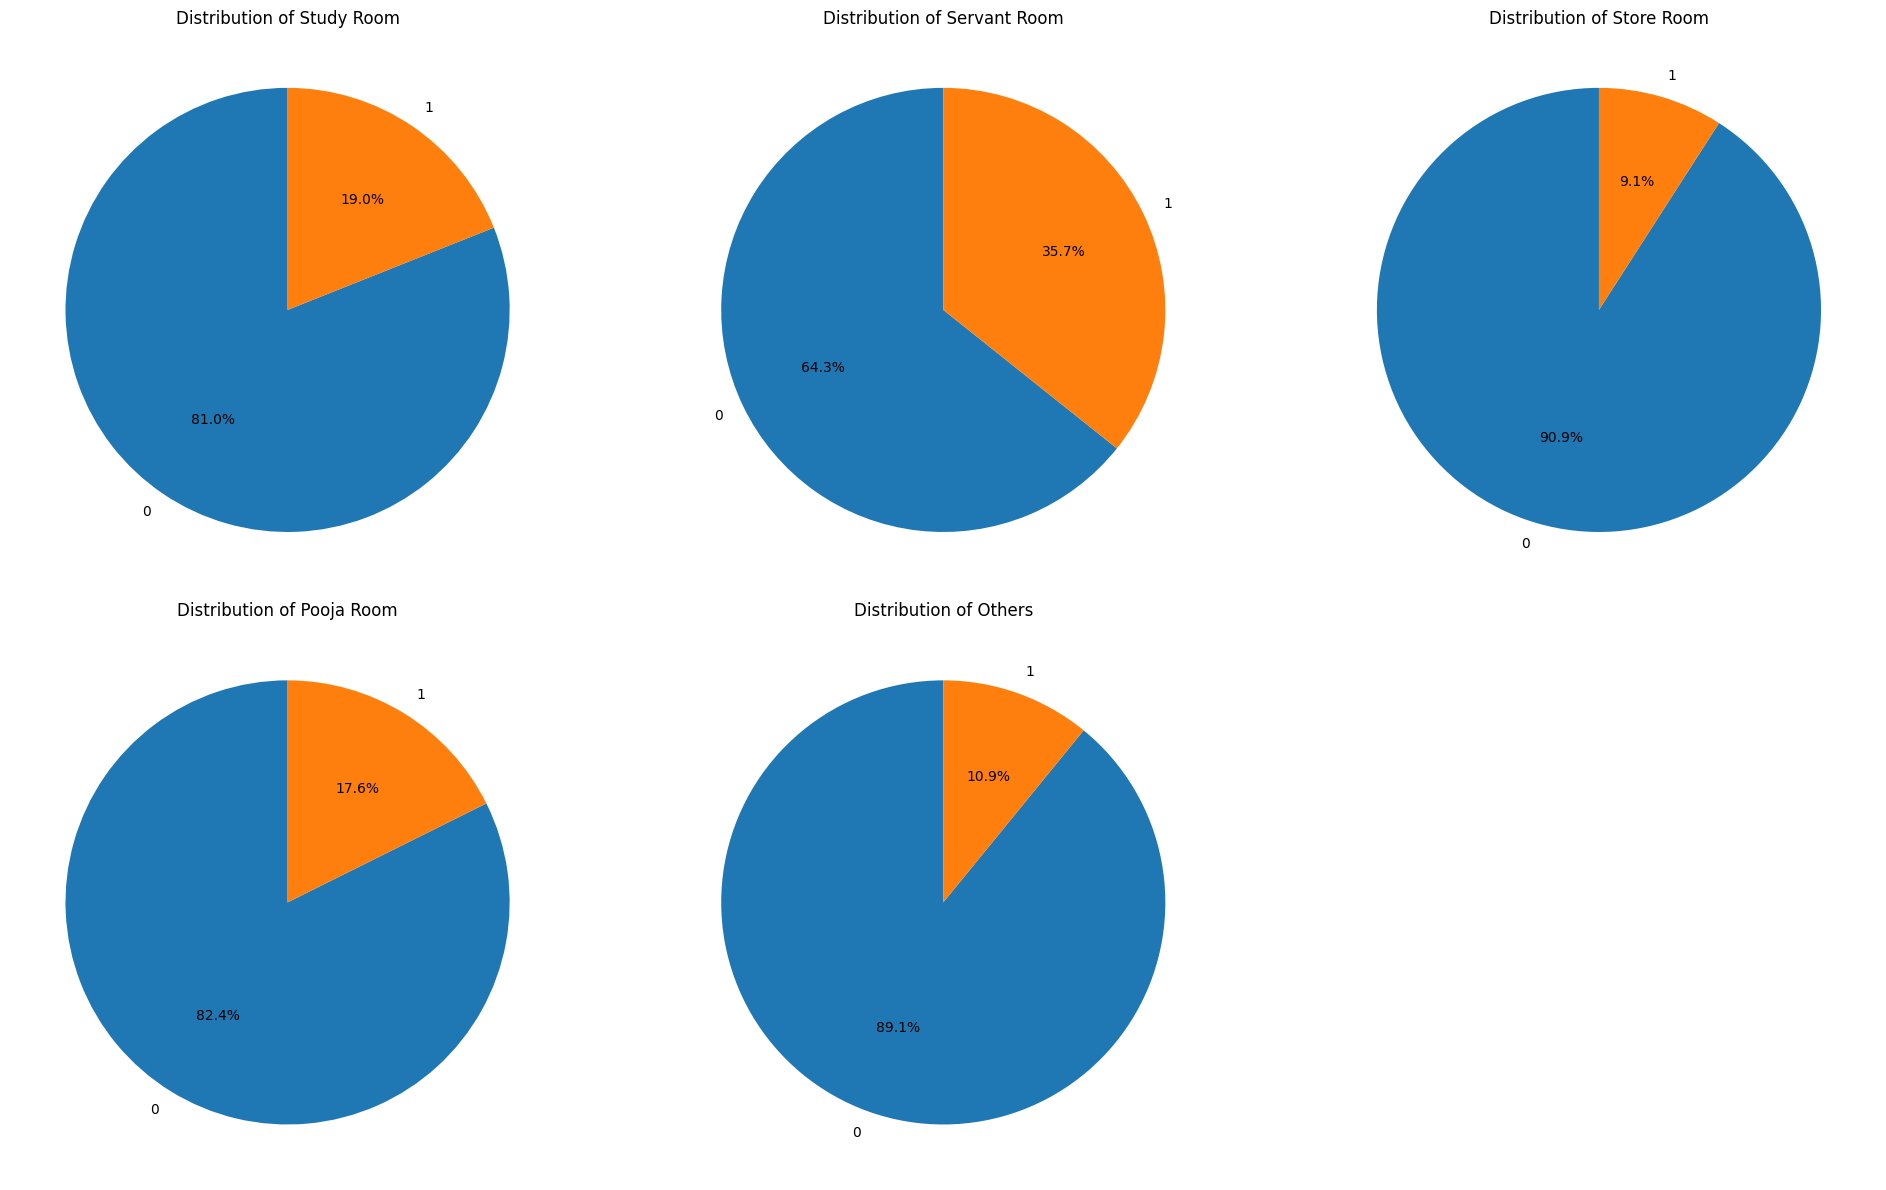

In [116]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [117]:
df['furnishing_type'].value_counts()

furnishing_type
0    2476
2    1039
1     203
Name: count, dtype: int64

<Axes: ylabel='count'>

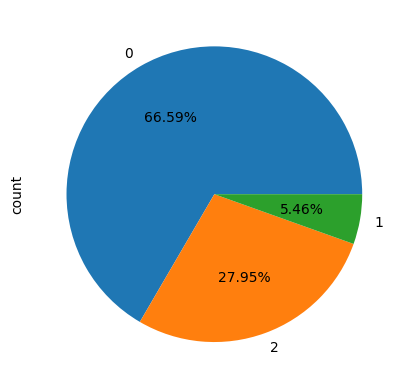

In [118]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [119]:
df['luxury_score'].isnull().sum()

np.int64(0)

In [120]:
df['luxury_score'].describe()

count    3718.000000
mean       71.119150
std        52.974048
min         0.000000
25%        31.000000
50%        58.000000
75%       109.750000
max       174.000000
Name: luxury_score, dtype: float64

<Axes: xlabel='luxury_score', ylabel='Count'>

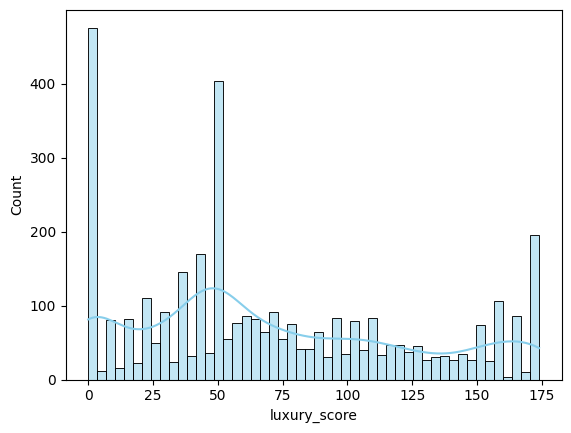

In [121]:
sns.histplot(df['luxury_score'], bins=50, color='skyblue', kde=True)

<Axes: ylabel='luxury_score'>

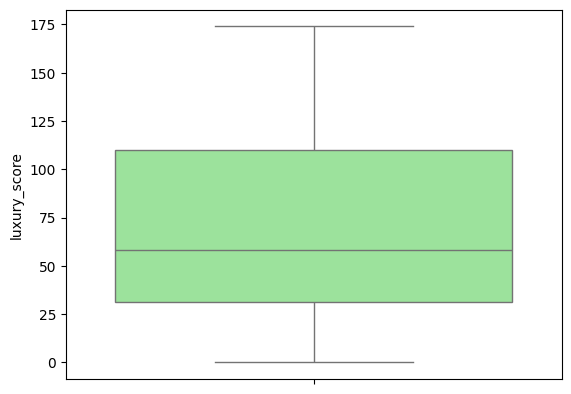

In [122]:
sns.boxplot(df['luxury_score'], color='lightgreen')


- The luxury score distribution has multiple peaks, suggesting a multi-modal distribution. There's a significant number of properties with lower luxury scores (around 0-50), and another peak is observed around the 110-130 range.

- The box plot reveals that the majority of the properties have luxury scores between approximately 30 and 110. The interquartile range (IQR) lies between these values

In [123]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,carpet_area,plot_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,badRoom
0,flat,experion windchants,sector 112,3.65,11428.0,3194.0,Built Up area: 2800 (260.13 sq.m.),3.0,2,2,...,NaN,NaN,0,1,0,0,0,0,72,3.0
1,flat,vatika gurgaon,sector 83,1.25,7812.0,1600.0,Super Built up area 2390(222.04 sq.m.)Carpet a...,4.0,3,3,...,1600.0,NaN,0,1,0,0,0,0,103,4.0
2,flat,green court,sector 90,0.47,6811.0,690.0,Carpet area: 690 (64.1 sq.m.),2.0,1,1,...,690.0,NaN,0,0,0,0,0,0,49,2.0
3,flat,orchid petals,sector 49,1.90,10526.0,1805.0,Super Built up area 1805(167.69 sq.m.)Built Up...,3.0,3,3,...,1400.0,NaN,0,0,0,0,1,2,49,3.0
4,flat,bestech altura,sector 79,2.69,12500.0,2152.0,Super Built up area 2150(199.74 sq.m.),3.0,0,3+,...,NaN,NaN,0,1,0,0,0,0,49,3.0
